In [ ]:
import pandas as pd
fatal_df = pd.read_csv("data/aviationaccidentdata.csv")
nonfatal_df = pd.read_csv("data/nonfatalsdata.csv")
fatal_df.info()
nonfatal_df.info()
fatal_df.head()

cols_to_drop = ["Operator", "Flight number", "Aircraft flight hours", "Aircraft flight cycles", "MSN", "Registration"]
fatal_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
fatal_df["Date"] = pd.to_datetime(fatal_df["Date & Time"], errors="coerce")
fatal_df["Year"] = fatal_df["Date"].dt.year
fatal_df["Month"] = fatal_df["Date"].dt.month
fatal_df["Total_onboard"] = fatal_df["Crew on board"] + fatal_df["Pax on board"]
fatal_df["Total_fatalities"] = (
    fatal_df["Crew fatalities"] + fatal_df["Pax fatalities"] + fatal_df["Other fatalities"]
)

fatal_df["Fatality_Rate"] = fatal_df["Total_fatalities"] / fatal_df["Total_onboard"]
fatal_df.head()
fatal_df["Date_Cleaned"] = fatal_df["Date & Time"].str.replace("LT", "").str.strip()
fatal_df["Date"] = pd.to_datetime(fatal_df["Date_Cleaned"], errors="coerce")
fatal_df[fatal_df["Fatality_Rate"] > 1]
fatal_df["Location"] = fatal_df["Location"].str.replace("\n", " ").str.strip()
fatal_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   URL                            32 non-null     object 
 1   Date & Time                    32 non-null     object 
 2   Type of aircraft               32 non-null     object 
 3   Operator                       2 non-null      object 
 4   Registration                   32 non-null     object 
 5   Flight Phase                   32 non-null     object 
 6   Flight Type                    32 non-null     object 
 7   Survivors                      32 non-null     object 
 8   Site                           32 non-null     object 
 9   Schedule                       32 non-null     object 
 10  MSN                            32 non-null     object 
 11  YOM                            31 non-null     float64
 12  Flight number                  9 non-null      objec

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/337228089.py:10: FutureWarning: Parsed string "Jun 12, 2025 at 1338 LT" included an un-recognized timezone "LT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  fatal_df["Date"] = pd.to_datetime(fatal_df["Date & Time"], errors="coerce")


,URL,Date & Time,Type of aircraft,Flight Phase,Flight Type,Survivors,Site,Schedule,YOM,Location,...,Copilot / Total hours on type,Probable cause,Final Report,Date,Year,Month,Total_onboard,Total_fatalities,Fatality_Rate,Date_Cleaned
0,https://www.baaa-acro.com/crash/crash-boeing-7...,"Jun 12, 2025 at 1338 LT",Boeing 787-8 Dreamliner,Takeoff (climb),Scheduled Revenue Flight,Yes,City,Ahmedabad - London,2013.0,Ahmedabad-Sardar Vallabhbhai Patel Gujarat,...,NaN,NaN,NaN,2025-06-12 13:38:00,2025.0,6.0,242,279,1.152893,"Jun 12, 2025 at 1338"
1,https://www.baaa-acro.com/crash/crash-boeing-7...,"Aug 7, 2020 at 1941 LT",Boeing 737-800,Landing (descent or approach),Charter/Taxi (Non Scheduled Revenue Flight),Yes,Airport (less than 10 km from airport),Dubai - Kozhikode,2006.0,Kozhikode-Calicut Kerala,...,1723.0,The probable cause of the accident was the non...,VT-AXH.pdf12.35 MB,2020-08-07 19:41:00,2020.0,8.0,190,21,0.110526,"Aug 7, 2020 at 1941"
2,https://www.baaa-acro.com/crash/crash-boeing-7...,"May 22, 2010 at 0605 LT",Boeing 737-800,Landing (descent or approach),Scheduled Revenue Flight,Yes,Airport (less than 10 km from airport),Dubai - Mangalore,2007.0,Mangalore-Bajpe Karnataka,...,3319.0,The Court of Inquiry determines that the cause...,VT-AXV.pdf4.43 MB,2010-05-22 06:05:00,2010.0,5.0,166,158,0.951807,"May 22, 2010 at 0605"
3,https://www.baaa-acro.com/crash/crash-antonov-...,"Jun 3, 2019 at 1300 LT",Antonov AN-32,Flight,Military,No,Mountains,Jorhat - Mechuka,1987.0,Lipo Arunachal Pradesh,...,NaN,NaN,NaN,2019-06-03 13:00:00,2019.0,6.0,13,13,1.000000,"Jun 3, 2019 at 1300"
4,https://www.baaa-acro.com/crash/crash-beechcra...,"Jun 28, 2018 at 1310 LT",Beechcraft 90 King Air,Landing (descent or approach),Test,No,City,Juhu - Juhu,1995.0,Mumbai Maharashtra,...,156.0,The probable cause of the accident was stall c...,VT-UPZ.pdf57.41 MB,2018-06-28 13:10:00,2018.0,6.0,4,4,1.000000,"Jun 28, 2018 at 1310"


In [ ]:
# View columns with missing data
fatal_df.isnull().sum()

# Drop rows where Date or Total_onboard is missing 
fatal_df.dropna(subset=["Date", "Total_onboard"], inplace=True)

# Optionally fill others
fatal_df["YOM"] = fatal_df["YOM"].fillna(fatal_df["YOM"].median())


fatal_df.sort_values(by="Date", ascending=True, inplace=True)
fatal_df.reset_index(drop=True, inplace=True)
fatal_df.info()
fatal_df.head()
fatal_df.to_csv("data/cleaned_fatal_crashes.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   URL                            29 non-null     object        
 1   Date & Time                    29 non-null     object        
 2   Type of aircraft               29 non-null     object        
 3   Flight Phase                   29 non-null     object        
 4   Flight Type                    29 non-null     object        
 5   Survivors                      29 non-null     object        
 6   Site                           29 non-null     object        
 7   Schedule                       29 non-null     object        
 8   YOM                            29 non-null     float64       
 9   Location                       29 non-null     object        
 10  Country                        29 non-null     object        
 11  Region               

In [ ]:
cols_to_fix = [
    "Captain / Total flying hours", "Copilot / Total flying hours",
    "Captain / Total hours on type", "Copilot / Total hours on type"
]

for col in cols_to_fix:
    fatal_df[col] = pd.to_numeric(fatal_df[col], errors="coerce")
    
fatal_df["Year"] = fatal_df["Year"].astype("Int64")
fatal_df["Month"] = fatal_df["Month"].astype("Int64")

fatal_df.drop(columns=["Date_Cleaned", "URL", "Final Report", "Site", "Schedule"], inplace=True, errors="ignore")

fatal_df.head()
fatal_df.to_csv("data/updated_fatal_crashes.csv", index=False)


In [15]:
cols = [
    "Captain / Total flying hours", "Copilot / Total flying hours",
    "Captain / Total hours on type", "Copilot / Total hours on type"
]

for col in cols:
    fatal_df[col] = pd.to_numeric(fatal_df[col], errors='coerce')
fatal_df.drop(columns=["Date & Time", "Survivors"], inplace=True, errors="ignore")
fatal_df["Date"] = pd.to_datetime(fatal_df["Date"])
fatal_df.sort_values("Date", inplace=True)
fatal_df.reset_index(drop=True, inplace=True)
fatal_df.to_csv("data/final_fatal_crashes.csv", index=False)

In [ ]:

fatal_df["Circumstances_Short"] = fatal_df["Circumstances"].str.slice(0, 300) + "..."
fatal_df.to_csv("data/final_fatal_crashes.csv", index=False)

In [21]:
fatal_df = fatal_df[fatal_df["Total_onboard"] > 0]
fatal_df["Fatality_Rate"] = fatal_df["Total_fatalities"] / fatal_df["Total_onboard"]
fatal_df["Onboard_fatalities"] = fatal_df["Crew fatalities"] + fatal_df["Pax fatalities"]
fatal_df["Fatality_Rate_Onboard"] = fatal_df["Onboard_fatalities"] / fatal_df["Total_onboard"]
fatal_df.to_csv("data/fatal_crashes.csv", index=False)

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/3062115167.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=fatal_df, palette='Reds_r')


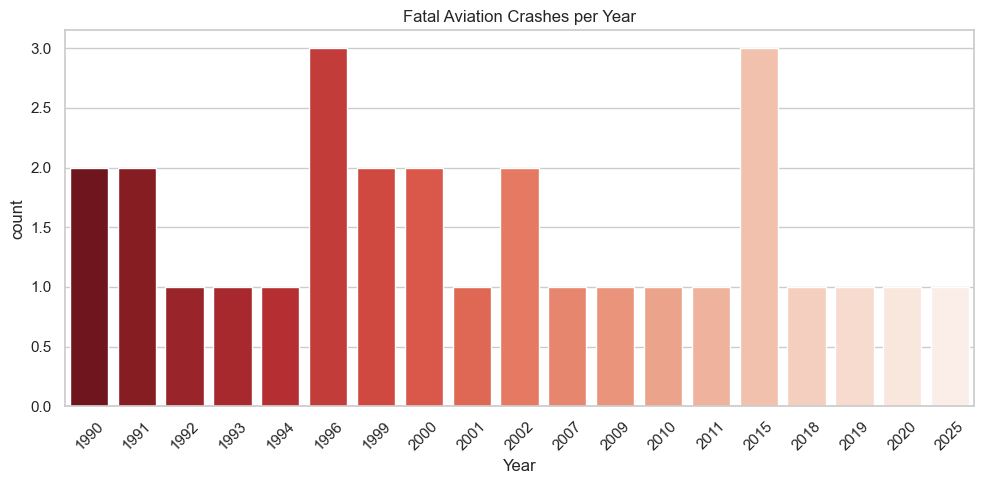

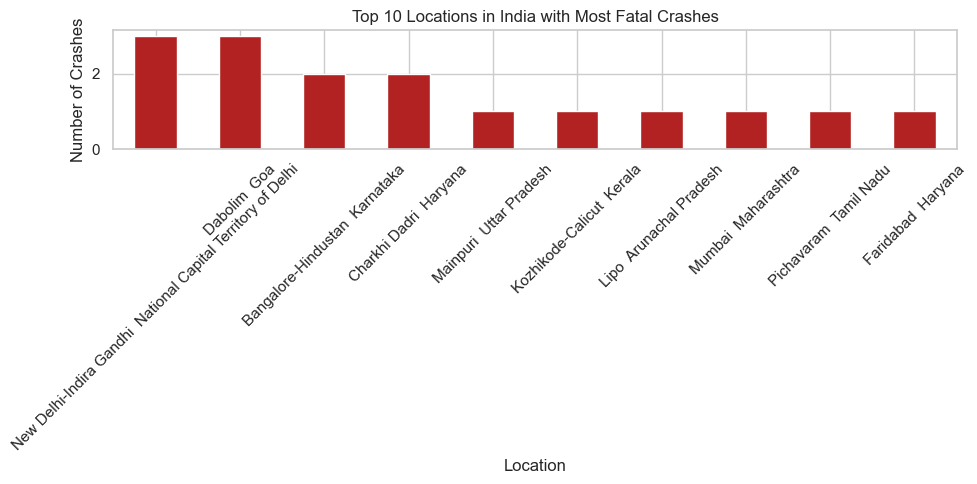

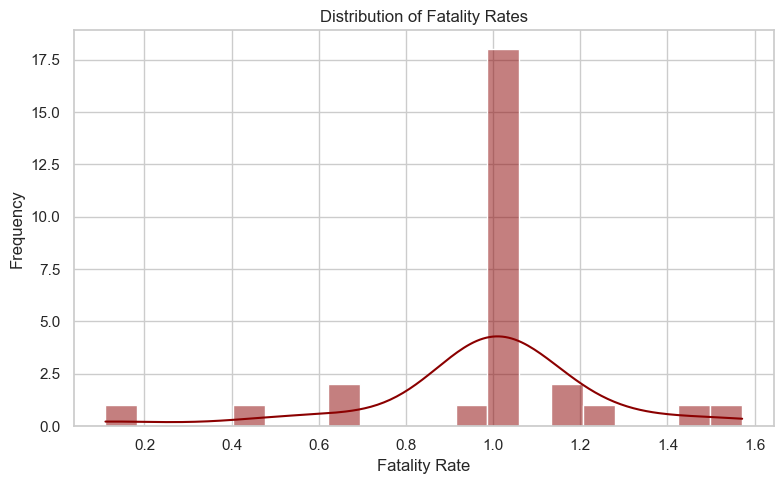

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/3062115167.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Flight Phase', data=fatal_df, order=fatal_df['Flight Phase'].value_counts().index, palette='Reds')


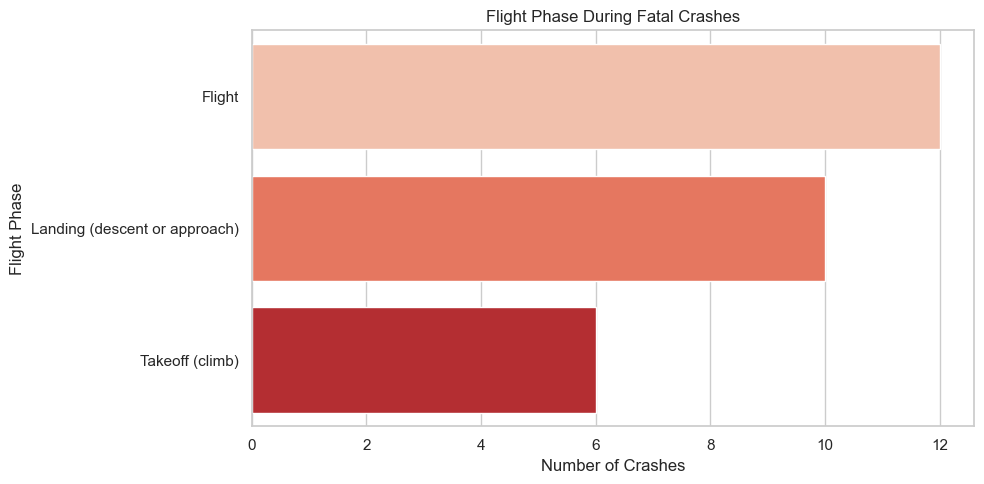

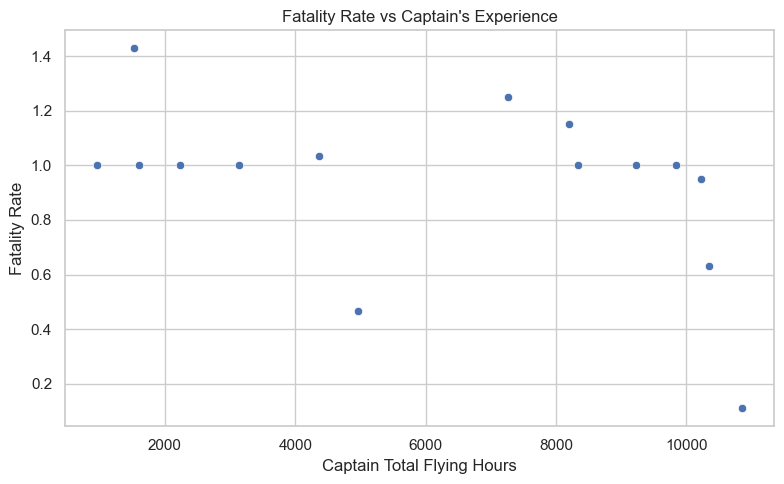

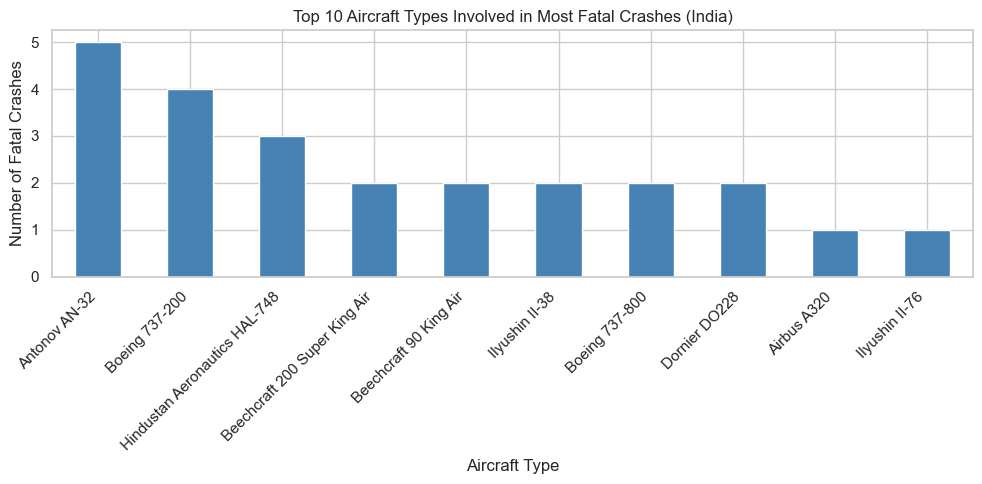

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")
fatal_df = pd.read_csv("data/fatal_crashes.csv", parse_dates=["Date"])
fatal_df.sort_values("Date", inplace=True)
plt.figure(figsize=(10,5))
fatal_df['Year'] = fatal_df['Date'].dt.year
sns.countplot(x='Year', data=fatal_df, palette='Reds_r')
plt.title("Fatal Aviation Crashes per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_locations = fatal_df['Location'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_locations.plot(kind='bar', color='firebrick')
plt.title("Top 10 Locations in India with Most Fatal Crashes")
plt.ylabel("Number of Crashes")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(fatal_df['Fatality_Rate'], bins=20, kde=True, color='darkred')
plt.title("Distribution of Fatality Rates")
plt.xlabel("Fatality Rate")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='Flight Phase', data=fatal_df, order=fatal_df['Flight Phase'].value_counts().index, palette='Reds')
plt.title("Flight Phase During Fatal Crashes")
plt.xlabel("Number of Crashes")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Captain / Total flying hours', y='Fatality_Rate', data=fatal_df)
plt.title("Fatality Rate vs Captain's Experience")
plt.xlabel("Captain Total Flying Hours")
plt.ylabel("Fatality Rate")
plt.tight_layout()
plt.show()

top_aircrafts = fatal_df['Type of aircraft'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_aircrafts.plot(kind='bar', color='steelblue')
plt.title("Top 10 Aircraft Types Involved in Most Fatal Crashes (India)")
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Fatal Crashes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


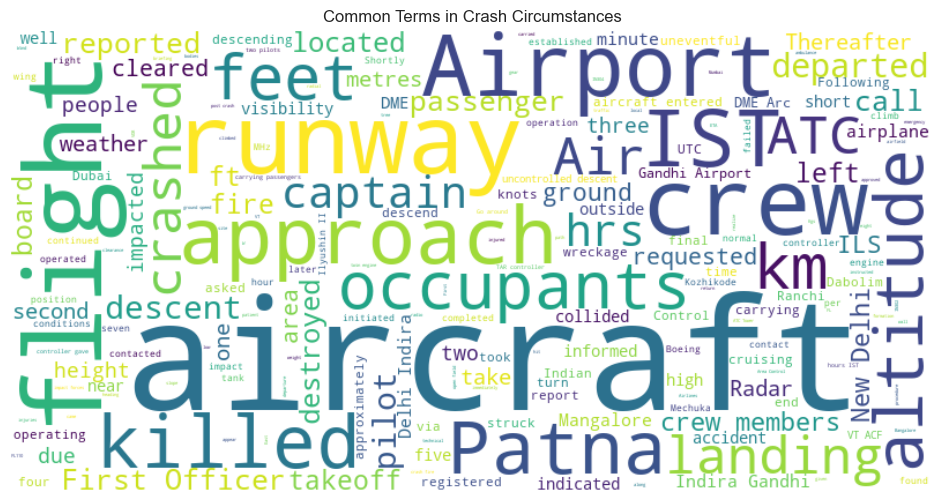

<Axes: xlabel='Cause_Category'>

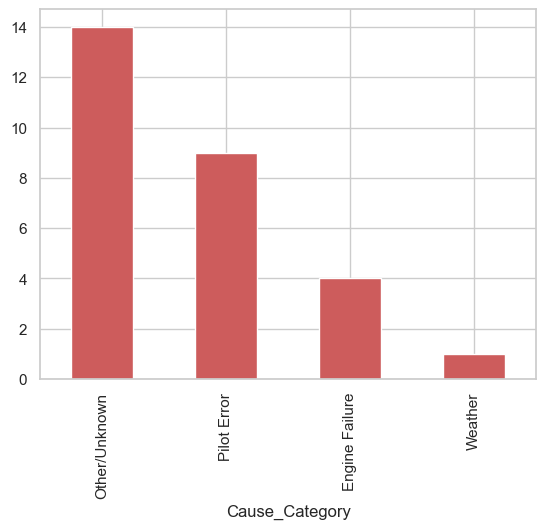

In [30]:
from wordcloud import WordCloud
text = " ".join(fatal_df["Circumstances"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Terms in Crash Circumstances")
plt.show()
#### 🧩 b. Keyword Tagging (e.g., “engine failure”, “pilot error”) Use keyword matching to group crashes by broad cause categories.

def categorize_cause(text):
    if pd.isna(text):
        return "Unknown"
    text = text.lower()
    if "pilot" in text:
        return "Pilot Error"
    elif "engine" in text:
        return "Engine Failure"
    elif "weather" in text:
        return "Weather"
    elif "maintenance" in text:
        return "Maintenance Issue"
    else:
        return "Other/Unknown"

fatal_df["Cause_Category"] = fatal_df["Probable cause"].apply(categorize_cause)
fatal_df["Cause_Category"].value_counts().plot(kind="bar", color="indianred")

In [34]:
%pip install scikit-learn

import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning to the 'Circumstances' column
fatal_df['Cleaned_Circumstances'] = fatal_df['Circumstances'].dropna().apply(clean_text)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 4.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


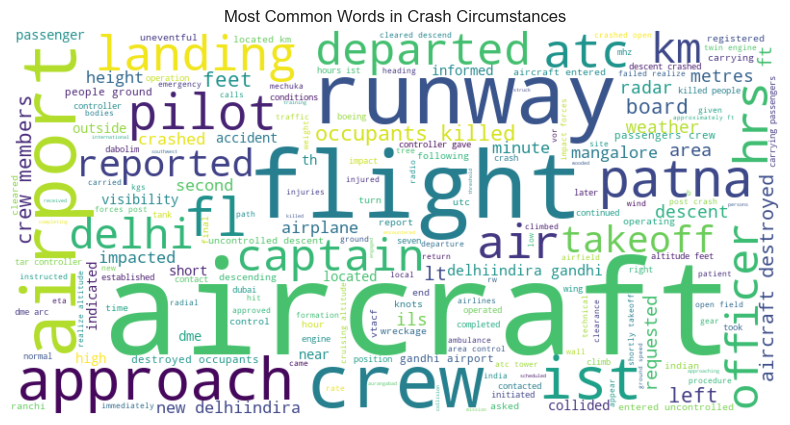

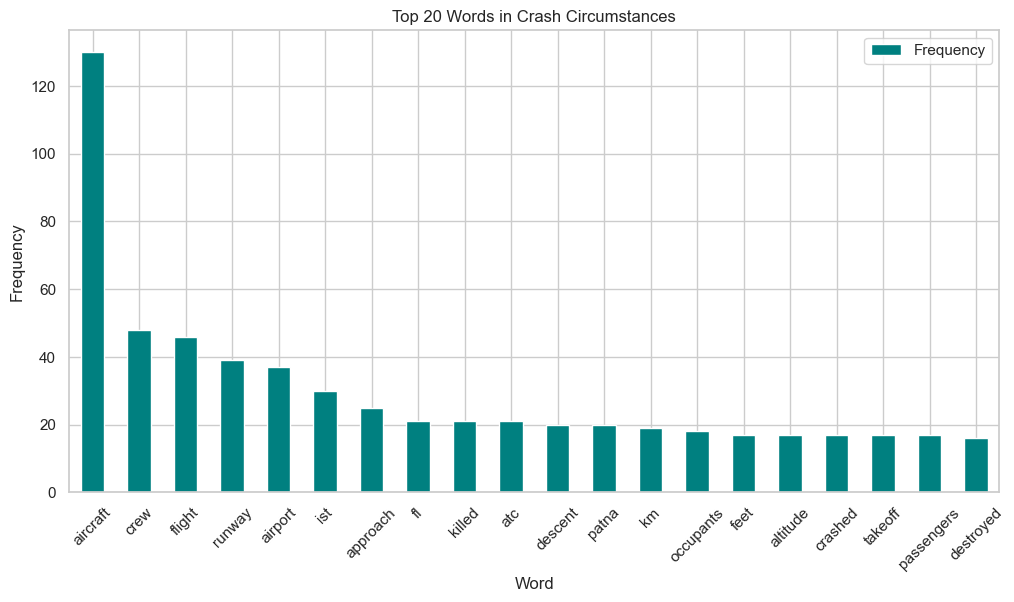

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(fatal_df["Cleaned_Circumstances"].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Crash Circumstances")
plt.show()

from collections import Counter

words = " ".join(fatal_df["Cleaned_Circumstances"].tolist()).split()
top_keywords = Counter(words).most_common(20)

keywords_df = pd.DataFrame(top_keywords, columns=['Word', 'Frequency'])
keywords_df.plot(kind='bar', x='Word', y='Frequency', figsize=(12, 6), color='teal')
plt.title("Top 20 Words in Crash Circumstances")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(fatal_df['Cleaned_Circumstances'])

lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(doc_term_matrix)

# Print topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['low', 'training', 'ambulance', 'doctors', 'southwest', 'insufficient', 'afb', 'realize', 'failed', 'northeast']
Topic #2:
['departed', 'new', 'destroyed', 'takeoff', 'occupants', 'km', 'killed', 'flight', 'crew', 'airport']
Topic #3:
['landing', 'descent', 'dme', 'hrs', 'ft', 'captain', 'officer', 'flight', 'approach', 'runway']
Topic #4:
['radar', 'weather', 'flight', 'left', 'delhi', 'controller', 'fl', 'crew', 'patna', 'ist']


In [48]:
import pandas as pd

# Load the data
nonfatal_df = pd.read_csv("data/nonfatalsdata.csv")

# Rename columns for consistency
nonfatal_df.columns = [col.strip().replace(" ", "_").replace("&", "and").lower() for col in nonfatal_df.columns]

# Drop irrelevant columns (adjust if any are not present)
cols_to_drop = [
    "operator", "flight_number", "aircraft_flight_hours", "aircraft_flight_cycles", 
    "msn", "registration", "url", "final_report", "site", "schedule"
]
nonfatal_df.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# Clean the 'date_and_time' column
nonfatal_df["date_cleaned"] = nonfatal_df["date_and_time"].astype(str).str.replace("LT", "").str.strip()
nonfatal_df["date"] = pd.to_datetime(nonfatal_df["date_cleaned"], errors="coerce")

# Extract year and month
nonfatal_df["year"] = nonfatal_df["date"].dt.year
nonfatal_df["month"] = nonfatal_df["date"].dt.month

# Clean location field
nonfatal_df["location"] = nonfatal_df["location"].astype(str).str.replace("\n", " ").str.strip()

# Create new columns for onboard and fatalities
nonfatal_df["total_onboard"] = nonfatal_df["crew_on_board"] + nonfatal_df["pax_on_board"]
nonfatal_df["total_fatalities"] = (
    nonfatal_df["crew_fatalities"] + nonfatal_df["pax_fatalities"] + nonfatal_df["other_fatalities"]
)
nonfatal_df["onboard_fatalities"] = nonfatal_df["crew_fatalities"] + nonfatal_df["pax_fatalities"]
nonfatal_df["fatality_rate"] = nonfatal_df["total_fatalities"] / nonfatal_df["total_onboard"]
nonfatal_df["fatality_rate_onboard"] = nonfatal_df["onboard_fatalities"] / nonfatal_df["total_onboard"]

# Handle pilot experience columns (if present)
cols_to_fix = [
    "captain_/total_flying_hours", "copilot_/total_flying_hours",
    "captain_/total_hours_on_type", "copilot_/total_hours_on_type"
]
for col in cols_to_fix:
    if col in nonfatal_df.columns:
        nonfatal_df[col] = pd.to_numeric(nonfatal_df[col], errors="coerce")

# Fill missing Year of Manufacture with median
if "yom" in nonfatal_df.columns:
    nonfatal_df["yom"] = nonfatal_df["yom"].fillna(nonfatal_df["yom"].median())

# Drop rows where date or onboard data is missing
nonfatal_df.dropna(subset=["date", "total_onboard"], inplace=True)

# Remove invalid onboard values
nonfatal_df = nonfatal_df[nonfatal_df["total_onboard"] > 0]

# Optional: drop extra columns
nonfatal_df.drop(columns=["date_and_time", "date_cleaned", "survivors"], inplace=True, errors="ignore")

# Final sorting and reset
nonfatal_df.sort_values("date", inplace=True)
nonfatal_df.reset_index(drop=True, inplace=True)

# After calculating total_fatalities
nonfatal_df["total_fatalities"] = (
    nonfatal_df["crew_fatalities"] + nonfatal_df["pax_fatalities"] + nonfatal_df["other_fatalities"]
)

# Remove rows where total fatalities are 5 or 11
nonfatal_df = nonfatal_df[~nonfatal_df["total_fatalities"].isin([5, 11])]



# Export cleaned data
nonfatal_df.to_csv("data/finalnon_fatal_crashes.csv", index=False)



/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/1364215697.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=non_fatal_df, palette='Reds_r')


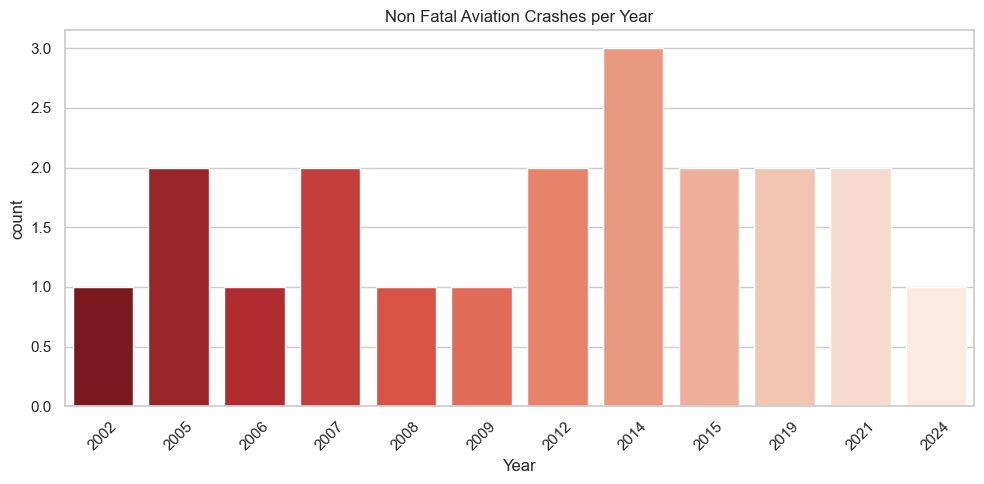

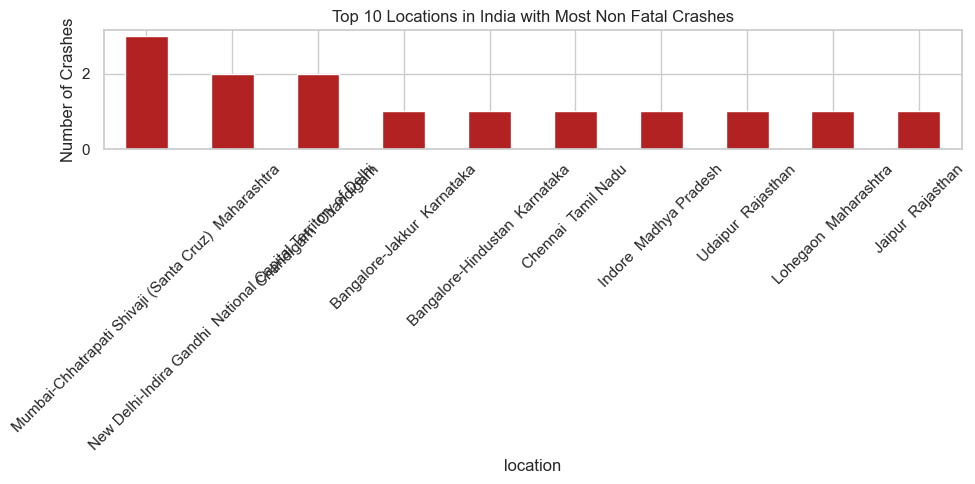

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   type_of_aircraft               20 non-null     object        
 1   flight_phase                   20 non-null     object        
 2   flight_type                    20 non-null     object        
 3   yom                            20 non-null     float64       
 4   location                       20 non-null     object        
 5   country                        20 non-null     object        
 6   region                         20 non-null     object        
 7   crew_on_board                  20 non-null     int64         
 8   crew_fatalities                20 non-null     int64         
 9   pax_on_board                   20 non-null     int64         
 10  pax_fatalities                 20 non-null     int64         
 11  other_fatalities     

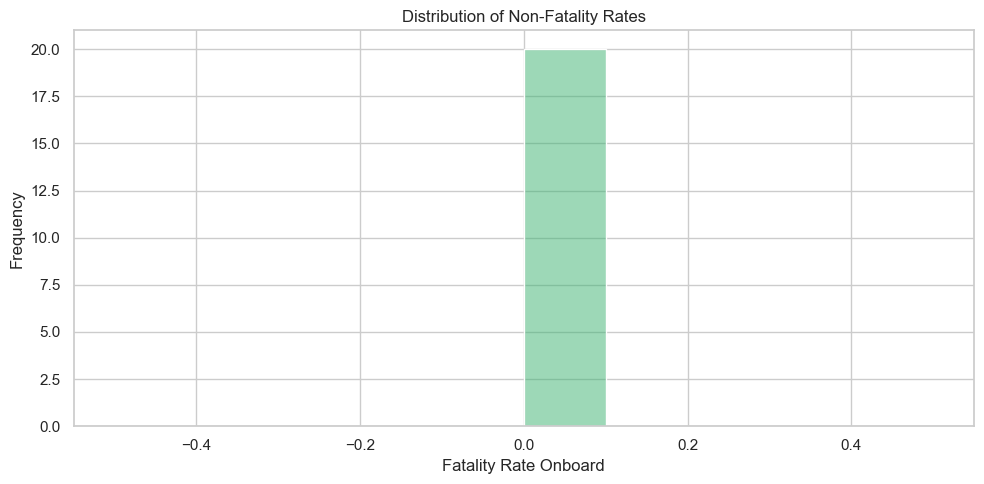

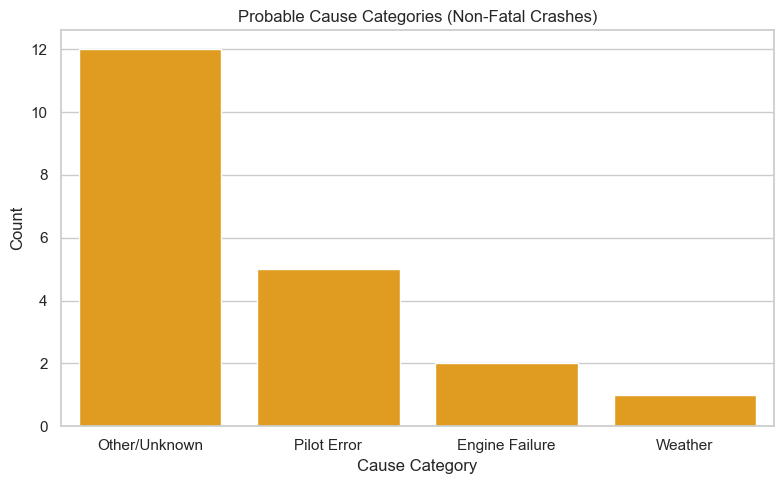

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/1364215697.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_aircrafts.index, y=top_aircrafts.values, palette="Blues_d")


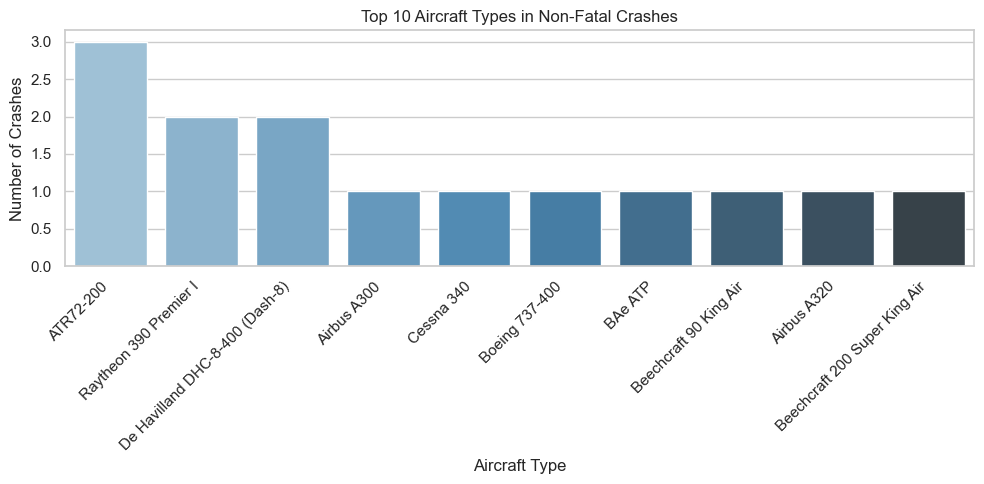

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/1364215697.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="Reds_r")


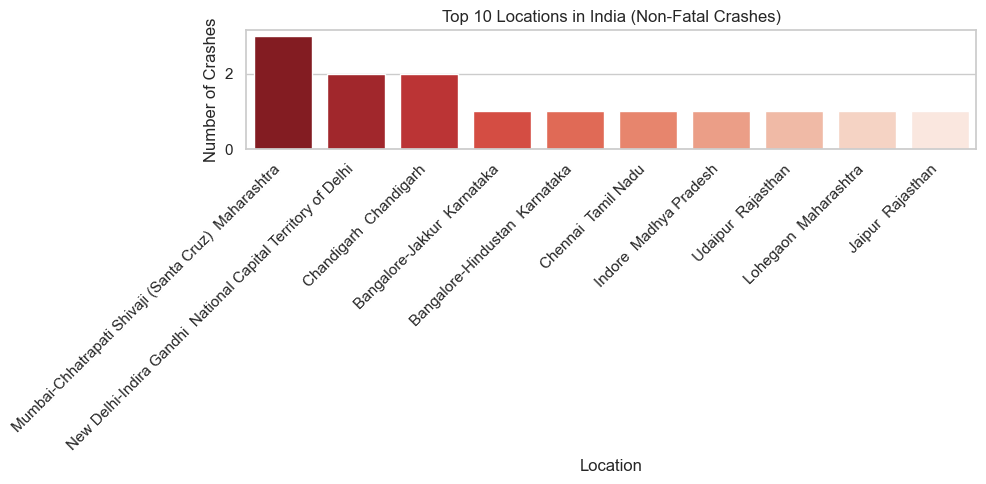

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/1364215697.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=non_fatal_df, x="Year", palette="coolwarm")


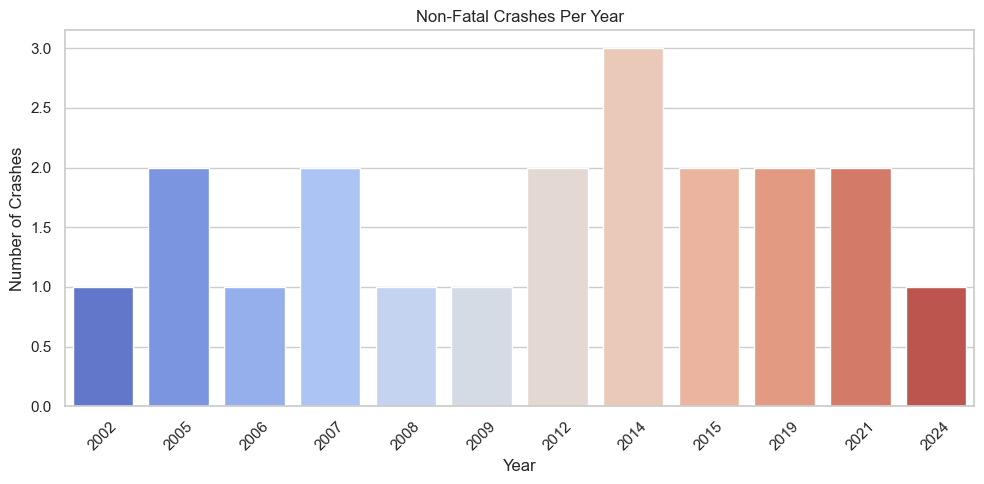

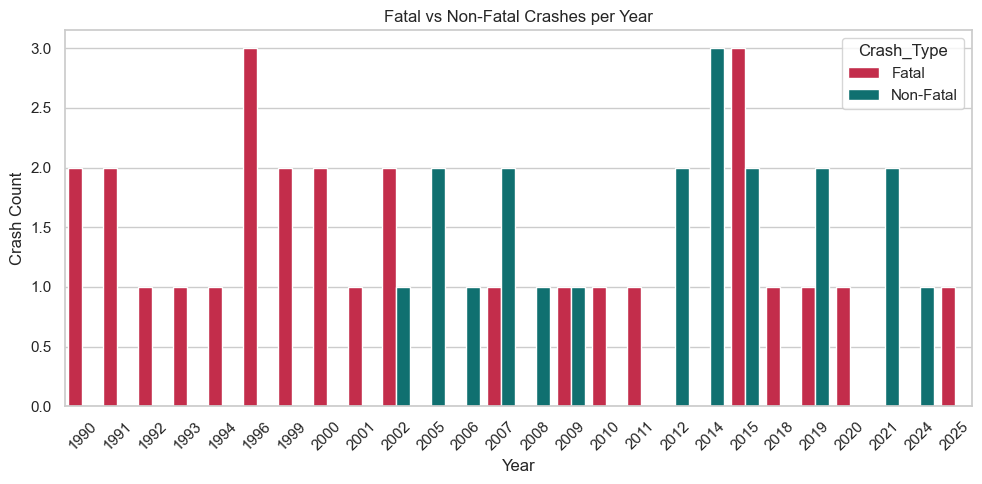

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/1364215697.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=non_fatal_df, x="flight_phase", order=non_fatal_df["flight_phase"].value_counts().index, palette="viridis")


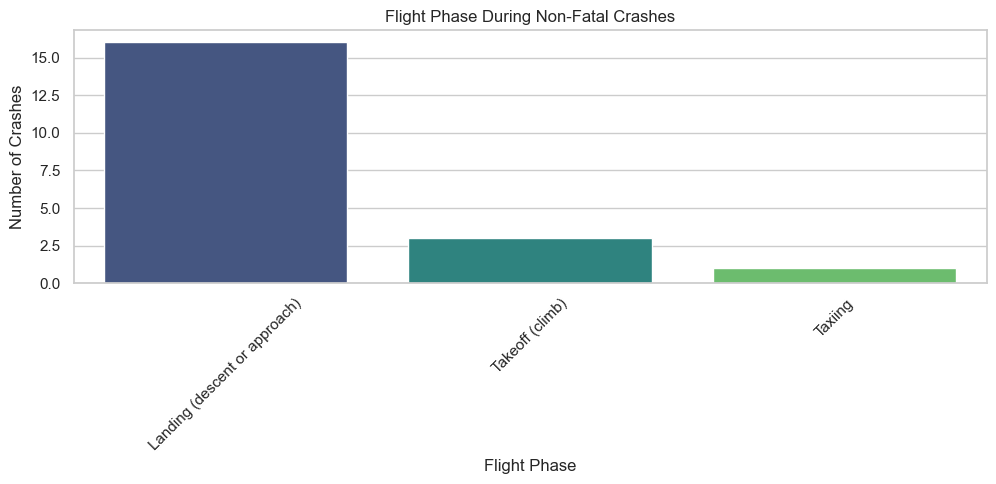

/var/folders/22/rfrfv2d561vc_9q4g24pjrbw0000gn/T/ipykernel_1506/1364215697.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=non_fatal_df, x="flight_type", order=non_fatal_df["flight_type"].value_counts().index, palette="mako")


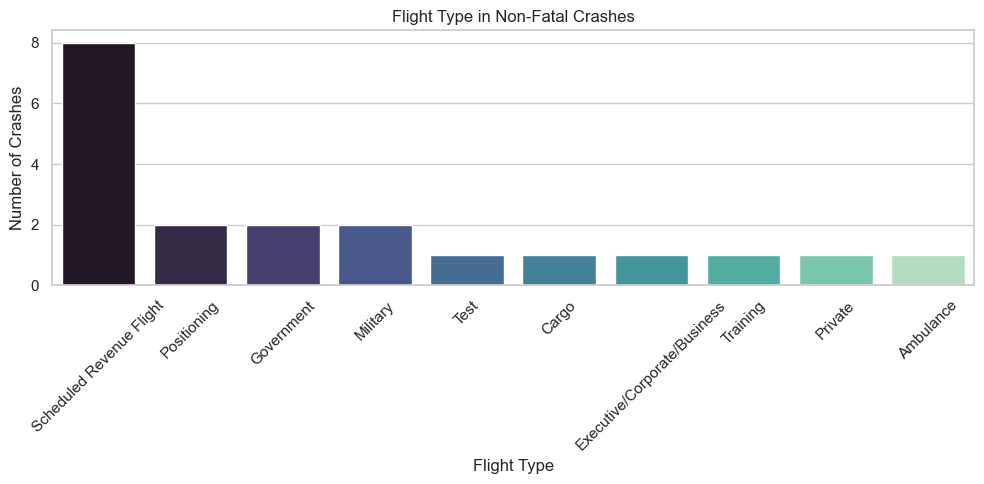

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visuals
sns.set(style="whitegrid")
non_fatal_df = pd.read_csv("data/finalnon_fatal_crashes.csv", parse_dates=["date"])
non_fatal_df.sort_values("date", inplace=True)
plt.figure(figsize=(10,5))
non_fatal_df['Year'] = non_fatal_df['date'].dt.year
sns.countplot(x='Year', data=non_fatal_df, palette='Reds_r')
plt.title("Non Fatal Aviation Crashes per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_locations = non_fatal_df['location'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_locations.plot(kind='bar', color='firebrick')
plt.title("Top 10 Locations in India with Most Non Fatal Crashes")
plt.ylabel("Number of Crashes")
plt.xlabel("location")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

non_fatal_df.info()
non_fatal_df.head()

plt.figure(figsize=(10, 5))
sns.histplot(non_fatal_df["fatality_rate_onboard"], bins=10, kde=True, color="mediumseagreen")
plt.title("Distribution of Non-Fatality Rates")
plt.xlabel("Fatality Rate Onboard")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

def categorize_cause(cause):
    if pd.isnull(cause):
        return "Other/Unknown"
    cause = cause.lower()
    if "pilot" in cause:
        return "Pilot Error"
    elif "engine" in cause or "mechanical" in cause:
        return "Engine Failure"
    elif "weather" in cause or "wind" in cause:
        return "Weather"
    else:
        return "Other/Unknown"

non_fatal_df["Cause_Category"] = non_fatal_df["probable_cause"].apply(categorize_cause)

plt.figure(figsize=(8, 5))
sns.countplot(data=non_fatal_df, x="Cause_Category", order=non_fatal_df["Cause_Category"].value_counts().index, color="orange")
plt.title("Probable Cause Categories (Non-Fatal Crashes)")
plt.xlabel("Cause Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
top_aircrafts = non_fatal_df["type_of_aircraft"].value_counts().nlargest(10)
sns.barplot(x=top_aircrafts.index, y=top_aircrafts.values, palette="Blues_d")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Aircraft Types in Non-Fatal Crashes")
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

india_df = non_fatal_df[non_fatal_df["country"].str.lower() == "india"]
top_cities = india_df["location"].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Reds_r")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Locations in India (Non-Fatal Crashes)")
plt.xlabel("Location")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=non_fatal_df, x="Year", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Non-Fatal Crashes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.tight_layout()
plt.show()

fatal_df["Crash_Type"] = "Fatal"
non_fatal_df["Crash_Type"] = "Non-Fatal"

# Merge both for comparison
combined_df = pd.concat([fatal_df[["Year", "Crash_Type"]], non_fatal_df[["Year", "Crash_Type"]]])

plt.figure(figsize=(10, 5))
sns.countplot(data=combined_df, x="Year", hue="Crash_Type", palette=["crimson", "teal"])
plt.title("Fatal vs Non-Fatal Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=non_fatal_df, x="flight_phase", order=non_fatal_df["flight_phase"].value_counts().index, palette="viridis")
plt.title("Flight Phase During Non-Fatal Crashes")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=non_fatal_df, x="flight_type", order=non_fatal_df["flight_type"].value_counts().index, palette="mako")
plt.title("Flight Type in Non-Fatal Crashes")
plt.xlabel("Flight Type")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

# Load data
fatal = pd.read_csv("fatal_crashes.csv")
nonfatal = pd.read_csv("finalnon_fatal_crashes.csv")

# Add crash type
fatal['Crash_Type'] = 'Fatal'
nonfatal['Crash_Type'] = 'Non-Fatal'
nonfatal.rename(columns={'date': 'Date'}, inplace=True)


# Convert Date to datetime and extract Year
fatal['Date'] = pd.to_datetime(fatal['Date'], errors='coerce')
nonfatal['Date'] = pd.to_datetime(nonfatal['Date'], errors='coerce')

fatal['Year'] = fatal['Date'].dt.year
nonfatal['Year'] = nonfatal['Date'].dt.year

# Keep only required columns
fatal = fatal[['Year', 'Crash_Type']]
nonfatal = nonfatal[['Year', 'Crash_Type']]

# Combine and summarize
combined = pd.concat([fatal, nonfatal])
summary = combined.groupby(['Year', 'Crash_Type']).size().reset_index(name='Crash_Count')

# Save to CSV for Tableau
summary.to_csv("merged_crashes.csv", index=False)



In [10]:
import pandas as pd

fatal = pd.read_csv("fatal_crashes.csv")
nonfatal = pd.read_csv("finalnon_fatal_crashes.csv")

fatal['Crash_Type'] = 'Fatal'
nonfatal['Crash_Type'] = 'Non-Fatal'

# Make sure both datasets have Location and Year
fatal = fatal[['Year', 'Location', 'Crash_Type']]
nonfatal = nonfatal[['year', 'location']].rename(columns={'year': 'Year', 'location': 'Location'})
nonfatal['Crash_Type'] = 'Non-Fatal'

# Combine
combined = pd.concat([fatal, nonfatal])

# Save for Tableau
combined.to_csv("mergedlocation_crashes.csv", index=False)


In [12]:
fatal = pd.read_csv("fatal_crashes.csv")
nonfatal = pd.read_csv("finalnon_fatal_crashes.csv")

fatal['Crash Type'] = 'Fatal'
nonfatal['Crash Type'] = 'Non-Fatal'
nonfatal['Total fatalities'] = 0  

combined = pd.concat([fatal[['Flight Phase', 'Crash Type', 'Total fatalities']],
                      nonfatal[['flight_phase', 'Crash Type', 'Total fatalities']]])

combined.to_csv("merged_flight_phase.csv", index=False)
